In [1]:
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.features import shapes
from rasterio.plot import show

### Polygonize Landslide Risk raster

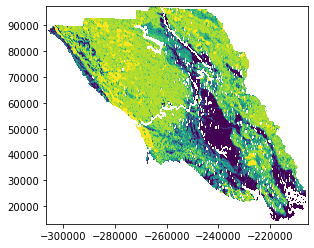

<AxesSubplot:>

In [10]:
# Landslide risk data
ls_risk = rasterio.open("../data/clean/soco_landslide_risk/ls_risk.tif")
show(ls_risk)

In [2]:
# Polygonize landslide risk raster
mask = None
with rasterio.Env():
    with rasterio.open('../data/clean/soco_landslide_risk/ls_risk.tif') as src:
        image = src.read(1) # first band
        results = (
        {'properties': {'risk': v}, 'geometry': s}
        for i, (s, v) 
        in enumerate(
            shapes(image, mask=mask, transform=src.transform)))

# convert to geopandas data frame
geoms = list(results)
ls_risk_shp  = gpd.GeoDataFrame.from_features(geoms)

In [3]:
# check if it worked
ls_risk_shp.head()

,geometry,risk
0,"POLYGON ((-267068.430 97282.205, -267068.430 9...",9.0
1,"POLYGON ((-267058.879 97272.653, -267058.879 9...",8.0
2,"POLYGON ((-267011.121 97272.653, -267011.121 9...",8.0
3,"POLYGON ((-266934.709 97272.653, -266934.709 9...",8.0
4,"POLYGON ((-267058.879 97263.102, -267058.879 9...",5.0


In [4]:
# save to file 
ls_risk_shp.to_file("../data/clean/soco_landslide_risk/ls_risk.shp")

In [ ]:
# Dissolve the polygon by risk
ls_risk_simp = ls_risk_shp.set_crs("EPSG:2226").dissolve(by="risk")
ls_risk_simp['landslide_risk'] = ls_risk_simp.index.values
ls_risk_simp = ls_risk_simp[(ls_risk_simp["landslide_risk"] > -1)] # get rid of no data category

In [ ]:
# save to file 
ls_risk_simp.to_file("../data/clean/soco_landslide_risk/ls_risk_simp.shp")